In [21]:
from sklearn import tree
import pandas as pd
from sklearn import ensemble
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import time as time
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

Q1

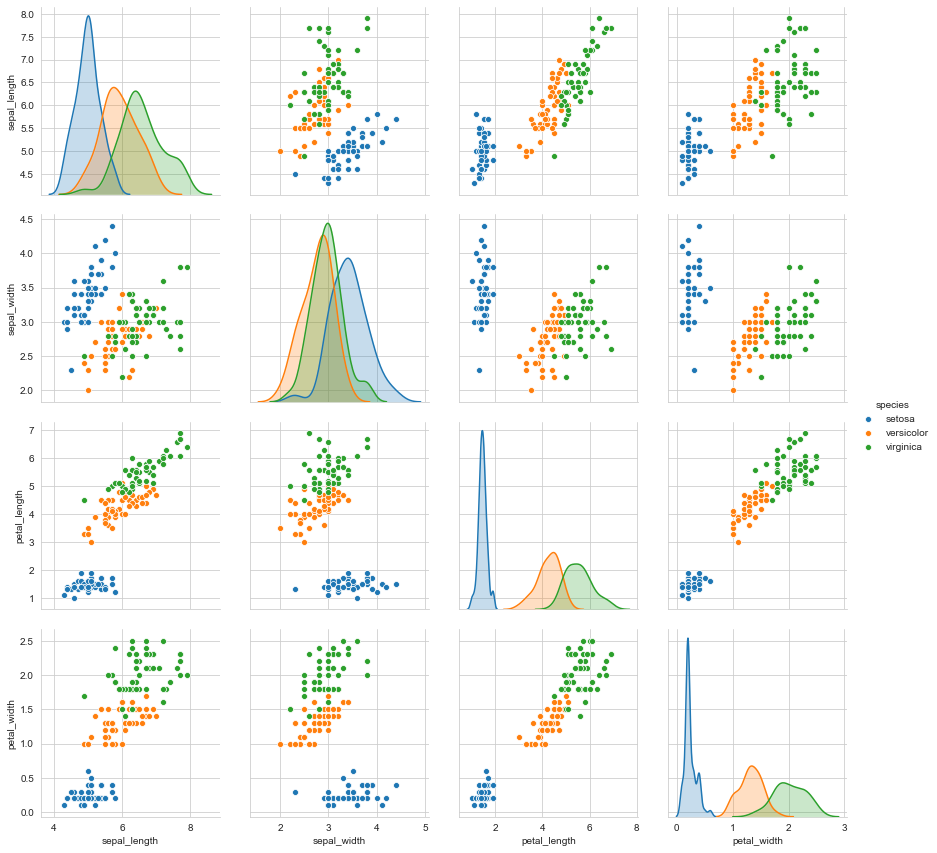

In [22]:
iris = sns.load_dataset("iris")
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", size=3);
plt.show()

1. From the above graph we can see that, in terms of standalone features, for Sepal features, there is no clear separability  between the classes as there graphs co-incide. For Petal features, we can see that Setosa is linearly separable from the other two classes as there is clear distinction between its graph and graphs of other two classes. 
2. Now looking at scatter plots of 2 features at once, we can see that with sepal features vs all other features, there is again no clear separability. We can say that Setosa has some separability but it is not very clear and may lead to misclassification of data. While, with petal length and petal width, we can see that there is much more vivid distinction of scatter plots and we can even draw a line to separate Setosa from other two classes. 
Hence, from the above plot we can conclude that, Petal length and petal width are the 2 features which can separate the data very well.

Q2

In [23]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42)

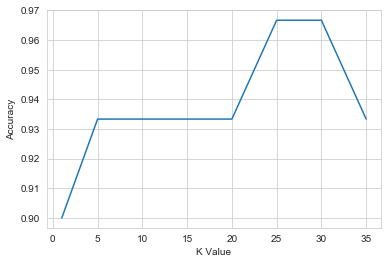

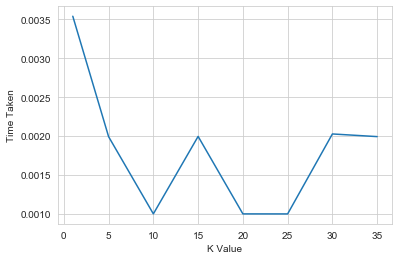

In [24]:
def classifier():
    kvalue = list()
    acc = list()
    time_taken = list()
    for i in (1, 5, 10, 15, 20, 25, 30, 35):
        t0 = time.time()
        knn = KNeighborsClassifier(n_neighbors=i)
        fit = knn.fit(X_train, y_train).predict(X_val)
        t1 = time.time()
        score = accuracy_score(y_val, fit)
        kvalue.append(i)
        acc.append(score)
        time_taken.append(t1-t0)
    return kvalue, acc, time_taken
kvalue, acc, time_taken = classifier()
plt.plot(kvalue,acc)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()
plt.plot(kvalue,time_taken)
plt.xlabel("K Value")
plt.ylabel("Time Taken")
plt.show()

We see that we get highest accuracy at K = 25 and K = 30. We choose K = 25 as the best hyperparameter as from the above graphs we can see at K = 25, we get highest accuracy and model takes least time to train. Also, odd K value is always preferred over an even value of K as it reduces the chances of a tie in the voting to decide to the class. In even K, the voting may get tied and our data may get misclassified.

In [25]:
knn_test = KNeighborsClassifier(n_neighbors=25)
fit_test = knn_test.fit(X_train, y_train).predict(X_test)
score_test = accuracy_score(y_test, fit_test)
print(score_test)

1.0


We get accuracy score of "1.0" by applying our model with K = 25 on test data.

Q3

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

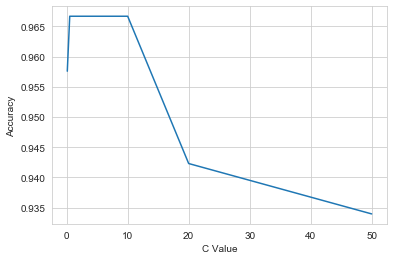

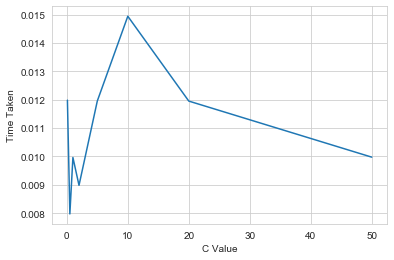

In [29]:
def svMachine():
    scores = list()
    cValue = list()
    time_taken = list()
    for i in (0.1, 0.5, 1, 2, 5, 10, 20, 50):
        t0 = time.time()
        clf = svm.SVC(C = i, kernel = 'linear')
        score = cross_val_score(clf, X_train, y_train, cv = 10)
        t1 = time.time()
        scores.append(score.mean())
        cValue.append(i)
        time_taken.append(t1-t0)
    return scores, cValue, time_taken
scores, cValue, time_taken = svMachine()
plt.plot(cValue,scores)
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.show()
plt.plot(cValue,time_taken)
plt.xlabel("C Value")
plt.ylabel("Time Taken")
plt.show()

We see that we get max accuracy values for C = 2,5,10. We choose C = 2 as the best hyperparameter as from the above graphs we can see at C = 2, we get highest accuracy and model takes least time to train. Also, lower C values leads more misclassification higher C value leads to overfitting of the data. Hence we choose a C value which is not very high and not very low and gives us best accuracy along with least time to train. 

In [30]:
clf_test = svm.SVC(C = 2, kernel = 'linear')
fit_test = clf_test.fit(X_train, y_train).predict(X_test)
score_test = accuracy_score(y_test, fit_test)
print(score_test)

1.0


We get accuracy score of "1.0" by applying our model with C = 2 on test data.

Q4

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

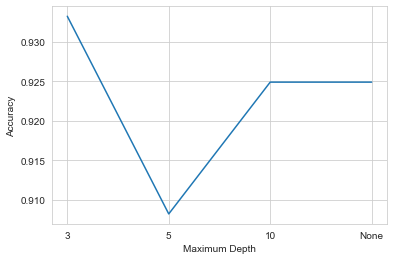

In [32]:
def decisionTree():
    scores = list()
    time_taken_dt = list()
    for i in (3,5,10,None):
        t0 = time.time()
        decision_tree = DecisionTreeClassifier(random_state=42, max_depth=i)
        score = cross_val_score(decision_tree, X_train, y_train, cv = 10)
        t1 = time.time()
        scores.append(score.mean())
        time_taken_dt.append(t1-t0)
    return scores, time_taken_dt
scores, time_taken_dt = decisionTree()
maxDepth = ["3", "5", "10", "None"]
plt.plot(maxDepth,scores)
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

We choose Max Depth = 3 as the best hyperparameter as from the above graphs we can see at Max Depth = 3, we get highest accuracy. 

In [33]:
clf_test_dt = DecisionTreeClassifier(random_state=42, max_depth=3)
fit_test = clf_test_dt.fit(X_train, y_train).predict(X_test)
score_test = accuracy_score(y_test, fit_test)
print(score_test)

1.0


We get accuracy score of "1.0" by applying our model with Max Depth = 3 on test data.

<function matplotlib.pyplot.show(*args, **kw)>

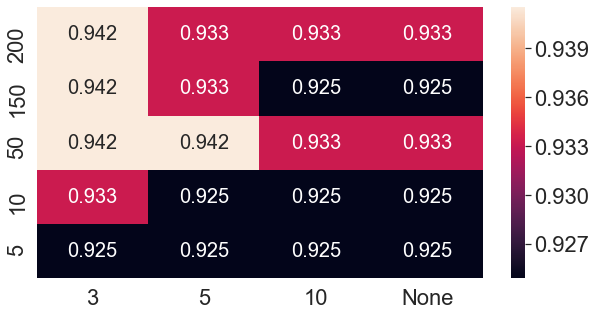

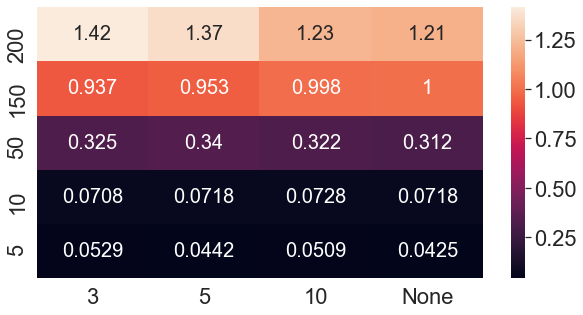

In [34]:
def randomForest():
    acc = []
    time_taken_rf = []
    for i in (5, 10, 50, 150, 200):
        accuracy = list()
        tt_rf = list()
        for j in (3,5,10,None):
            t4 = time.time()
            rf = RandomForestClassifier(n_estimators = i, max_depth=j, random_state=42)
            score = cross_val_score(rf, X_train, y_train, cv = 10) 
            t5 = time.time()
            accuracy.append(score.mean())
            tt_rf.append(t5-t4)
        acc.append(accuracy)
        time_taken_rf.append(tt_rf)
    return accuracy, acc, time_taken_rf
accuracy, acc, time_taken_rf = randomForest()
data = pd.DataFrame(acc, columns = ["3","5","10","None"], index = [5,10,50,150,200])
sns.set(font_scale = 2)
plt.figure(figsize = (10,5))
graph = sns.heatmap(data, annot = True, annot_kws = {"size":20}, ax = None, fmt = '0.3g')
graph.set_xlim(0,4)
graph.set_ylim(0,5)
plt.show
data_time = pd.DataFrame(time_taken_rf, columns = ["3","5","10","None"], index = [5,10,50,150,200])
sns.set(font_scale = 2)
plt.figure(figsize = (10,5))
graph = sns.heatmap(data_time, annot = True, annot_kws = {"size":20}, ax = None, fmt = '0.3g')
graph.set_xlim(0,4)
graph.set_ylim(0,5)
plt.show

We plot heatmaps to determine the best hyperparameter. The first heatmap is for the accuracy score and we have Max Depth on x-axis and Number of Estimators on y-axis, while the second heatmap is for the time taken by model to train and we have Max Depth on x-axis and Number of Estimators on y-axis.
We choose Max Depth = 3 and Number of Estimators = 50 as the best hyperparameter as from the above graphs we can see at Max Depth = 3 and Number of Estimators = 50 , we get highest accuracy at these hyperparameters and also the model takes least time to train on these hyperparameters amongst the highest accuracy hyperparameters. Also, higher number of tress or higher max depth may lead to overfitting and lower number of trees or max depth may lead to underfitting. Hence we choose values which are not very high and not very low.

In [35]:
clf_test_rf = RandomForestClassifier(n_estimators = 50, max_depth=3, random_state=42)
fit_test_rf = clf_test_rf.fit(X_train, y_train).predict(X_test)
score_test_rf = accuracy_score(y_test, fit_test_rf)
print(score_test_rf)

1.0


We get accuracy score of "1.0" by applying our model with Max Depth = 3 and Number of Estimators = 50 on test data.

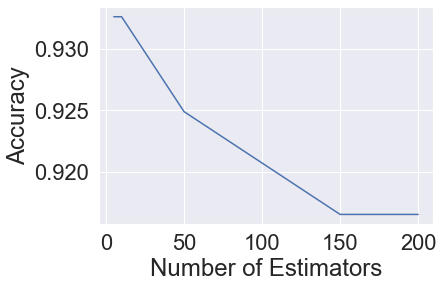

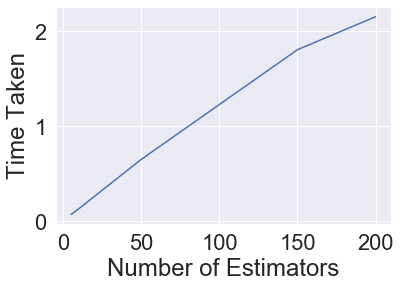

In [36]:
def gradientBoosting():
    scores_gb = list()
    time_taken_gb = list()
    for i in (5, 10, 50, 150, 200):
        t2 = time.time()
        gradient_boosting = ensemble.GradientBoostingClassifier(random_state=42, n_estimators=i)
        score = cross_val_score(gradient_boosting, X_train, y_train, cv = 10)
        t3 = time.time()
        scores_gb.append(score.mean())
        time_taken_gb.append(t3-t2)
    return scores_gb, time_taken_gb
scores_gb, time_taken_gb = gradientBoosting()
n_estimators = [5, 10, 50, 150, 200]
plt.plot(n_estimators,scores_gb)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()
plt.plot(n_estimators,time_taken_gb)
plt.xlabel("Number of Estimators")
plt.ylabel("Time Taken")
plt.show()

We are getting highest accuracy for n_estimators = 5 and 10 as we can see from the graph. We choose Number of Estimators = 5 as the best hyperparameter as from the above graphs we can see at Number of Estimators = 5, we get highest accuracy and also the model takes least time to train with Number of Estimators = 5.

In [37]:
clf_test_gb = ensemble.GradientBoostingClassifier(random_state=42, n_estimators=5)
fit_test_gb = clf_test_gb.fit(X_train, y_train).predict(X_test)
score_test_gb = accuracy_score(y_test, fit_test_gb)
print(score_test_gb)

1.0


We get accuracy score of "1.0" by applying our model with Number of Estimators = 5 on test data.